In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing,neighbors

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(5)

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


In [4]:
inputs = data[['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC']]
fertile= data['Output']


<AxesSubplot:>

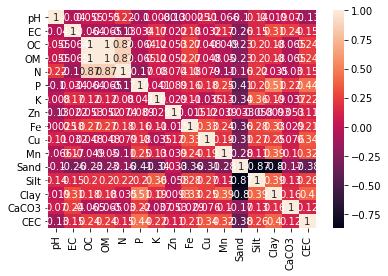

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(inputs,fertile,test_size = 0.2,random_state =0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(Xtrain,Ytrain)

predicted_values = regressor.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

print(x)

print(classification_report(Ytest,predicted_values))

0.9
              precision    recall  f1-score   support

     Fertile       1.00      0.83      0.91        12
 Non Fertile       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,inputs,fertile,cv=5)
score

array([0.9 , 0.95, 1.  , 1.  , 1.  ])

In [10]:
regressor.predict([[7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81]])

array(['Fertile'], dtype=object)

In [14]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81]]))

['Fertile']
